# Predicting Life Expectancy With Deep Learning

This Jupyter Notebook project focuses on predicting life expectancy using a deep learning model. It utilizes a dataset containing various features that can impact life expectancy, and follows a structured workflow to preprocess the data, build a deep learning model, and visualize the results.

# 1. Data Exploration
In this section, the project begins by loading the dataset and conducting initial data exploration to understand the dataset's structure. The key steps in this section include:

* __Importing necessary libraries__
* __Displaying the first few rows of the dataset__
* __Checking data types and missing values__
* __Summarizing statistics of numerical columns__
* __Checking for missing values in each column__
* __Visualizing the correlation matrix using a heatmap__
* __Plotting histograms for numerical columns__
* __The data appears to be clean, with no missing values, and provides insights into the dataset's characteristics.__

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam
import shap

In [4]:
# Load the dataset
dataset = pd.read_csv("life_expectancy.csv")

In [5]:
# Display the first few rows of the dataset
print("Sample of the dataset:")
dataset.head()

Sample of the dataset:


Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0               71.279624         65.0      1154   19.1  ...   
1               73.523582         62.0       492   18.6  ...   
2               73.219243         64.0       430   18.1  ...   
3               78.184215         67.0      2787   17.6  ...   
4                7.097109         68.0      3013   17.2  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  Life expectancy  
0                            0.479       10.1             65.0  
1                            0.476       10.0             59.9  
2                            0.470        9.9             59.9  
3                            0.463        9.8             59.5  
4                            0.454        9.5             59.2  

[5 rows x 22 columns]

In [7]:
# Check the data types and missing values
print("\nData types and missing values:")
dataset.info()


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   f

In [8]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
dataset.describe()


Summary statistics of numerical columns:


Year  Adult Mortality  infant deaths      Alcohol  \
count  2938.000000      2938.000000    2938.000000  2938.000000   
mean   2007.518720       164.725664      30.303948     4.546875   
std       4.613841       124.086215     117.926501     3.921946   
min    2000.000000         1.000000       0.000000     0.010000   
25%    2004.000000        74.000000       0.000000     1.092500   
50%    2008.000000       144.000000       3.000000     3.755000   
75%    2012.000000       227.000000      22.000000     7.390000   
max    2015.000000       723.000000    1800.000000    17.870000   

       percentage expenditure  Hepatitis B       Measles          BMI   \
count             2938.000000  2938.000000    2938.000000  2938.000000   
mean               738.251295    83.022124    2419.592240    38.381178   
std               1987.914858    22.996984   11467.272489    19.935375   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.685343    82.000000       0.000000    19.400000   
50%                 64.912906    92.000000      17.000000    43.500000   
75%                441.534144    96.000000     360.250000    56.100000   
max              19479.911610    99.000000  212183.000000    87.300000   

       under-five deaths         Polio  Total expenditure  Diphtheria   \
count         2938.000000  2938.000000        2938.000000  2938.000000   
mean            42.035739    82.617767           5.924098    82.393125   
std            160.445548    23.367166           2.400770    23.655562   
min              0.000000     3.000000           0.370000     2.000000   
25%              0.000000    78.000000           4.370000    78.000000   
50%              4.000000    93.000000           5.755000    93.000000   
75%             28.000000    97.000000           7.330000    97.000000   
max           2500.000000    99.000000          17.600000    99.000000   

          HIV/AIDS            GDP    Population   thinness  1-19 years  \
count  2938.000000    2938.000000  2.938000e+03            2938.000000   
mean      1.742103    6611.523863  1.023085e+07               4.821886   
std       5.077785   13296.603449  5.402242e+07               4.397621   
min       0.100000       1.681350  3.400000e+01               0.100000   
25%       0.100000     580.486996  4.189172e+05               1.600000   
50%       0.100000    1766.947595  1.386542e+06               3.300000   
75%       0.800000    4779.405190  4.584371e+06               7.100000   
max      50.600000  119172.741800  1.293859e+09              27.700000   

        thinness 5-9 years  Income composition of resources    Schooling  \
count          2938.000000                      2938.000000  2938.000000   
mean              4.852144                         0.630362    12.009837   
std               4.485854                         0.205140     3.265139   
min               0.100000                         0.000000     0.000000   
25%               1.600000                         0.504250    10.300000   
50%               3.300000                         0.677000    12.300000   
75%               7.200000                         0.772000    14.100000   
max              28.600000                         0.948000    20.700000   

       Life expectancy  
count      2938.000000  
mean         69.234717  
std           9.509115  
min          36.300000  
25%          63.200000  
50%          72.100000  
75%          75.600000  
max          89.000000

In [9]:
# Check for missing values in each column
print("\nMissing values in each column:")
dataset.isnull().sum()


Missing values in each column:


Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [11]:
# Correlation matrix to check the relationships between variables
correlation_matrix = dataset.corr()

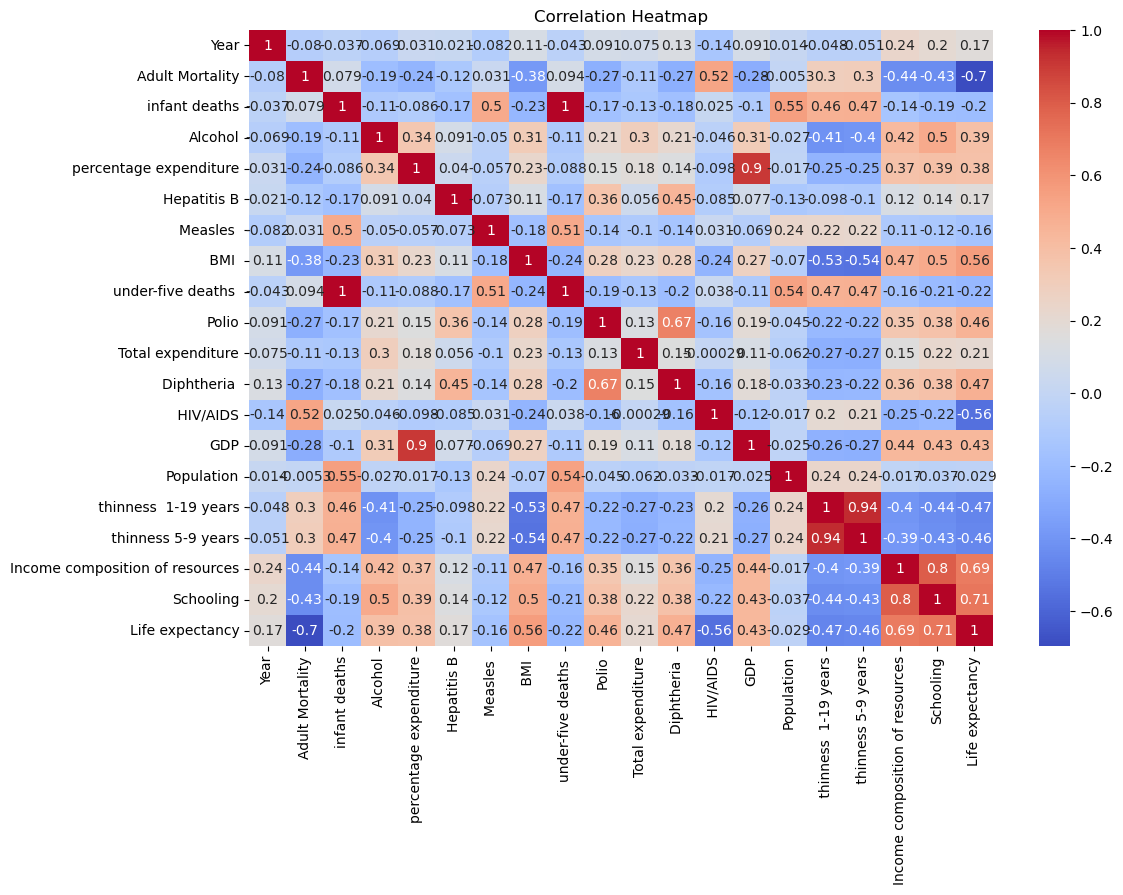

In [12]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

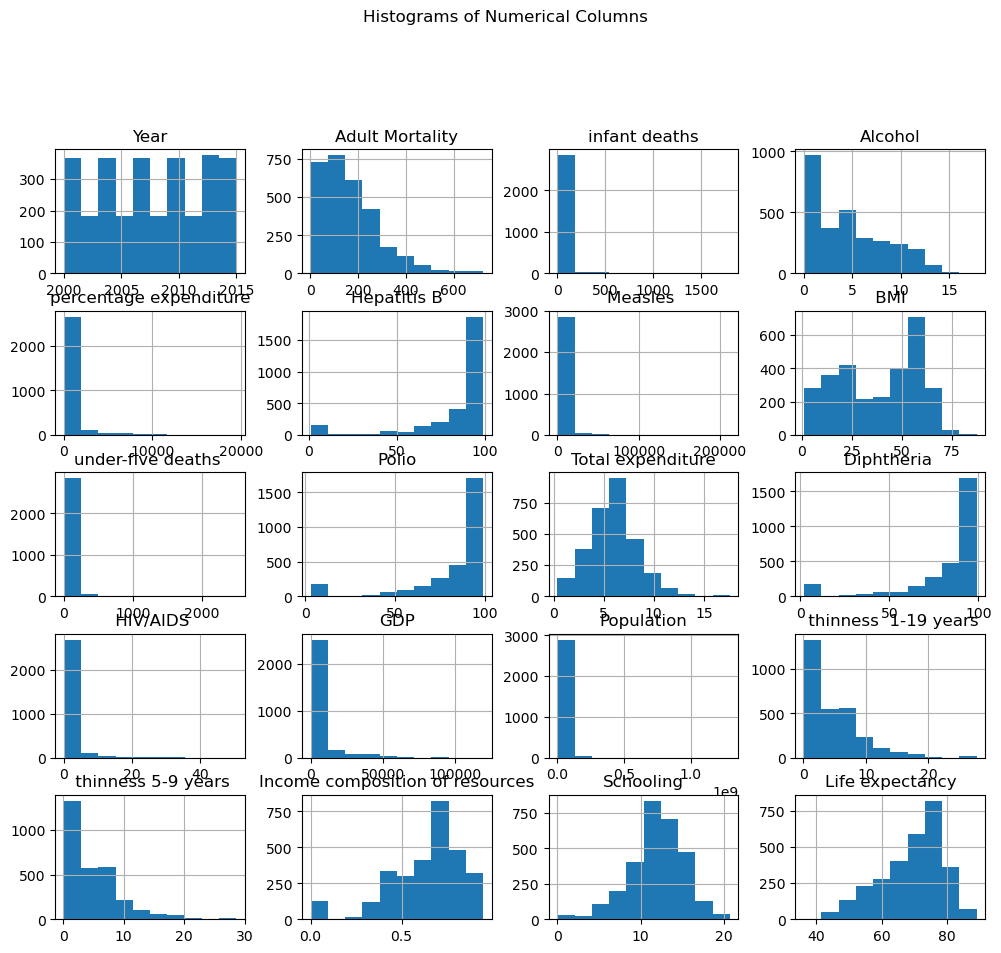

In [14]:
# Plot histograms for numerical columns
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numerical_cols].hist(figsize=(12, 10))
plt.suptitle("Histograms of Numerical Columns", y=1.02)
plt.show()

# Objective:
The World Health Organization (WHO) tracks life expectancy data by considering various factors. 
We'll build a neural network regression model to predict life expectancy based on these factors.

# Data Preprocessing
This section focuses on data preparation for model building. Key steps include:

* Dropping unnecessary columns (e.g., "Country") and performing one-hot encoding on categorical variables (e.g., "Status")
* Splitting the dataset into training and testing sets
* Scaling the numeric features using StandardScaler
* Preparing the target variable ("Life expectancy")

In [15]:
# Drop unnecessary columns and perform one-hot encoding
life_e = dataset.iloc[:,-1]
features = dataset.drop(columns=["Life expectancy", "Country"])
features = pd.get_dummies(features)

In [17]:
# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, life_e, test_size=0.2)

# Scale the numeric features
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    remainder='passthrough'
)

features_train_scale = preprocessor.fit_transform(features_train)
features_test_scale = preprocessor.transform(features_test)

The data is now ready for training a deep learning model.

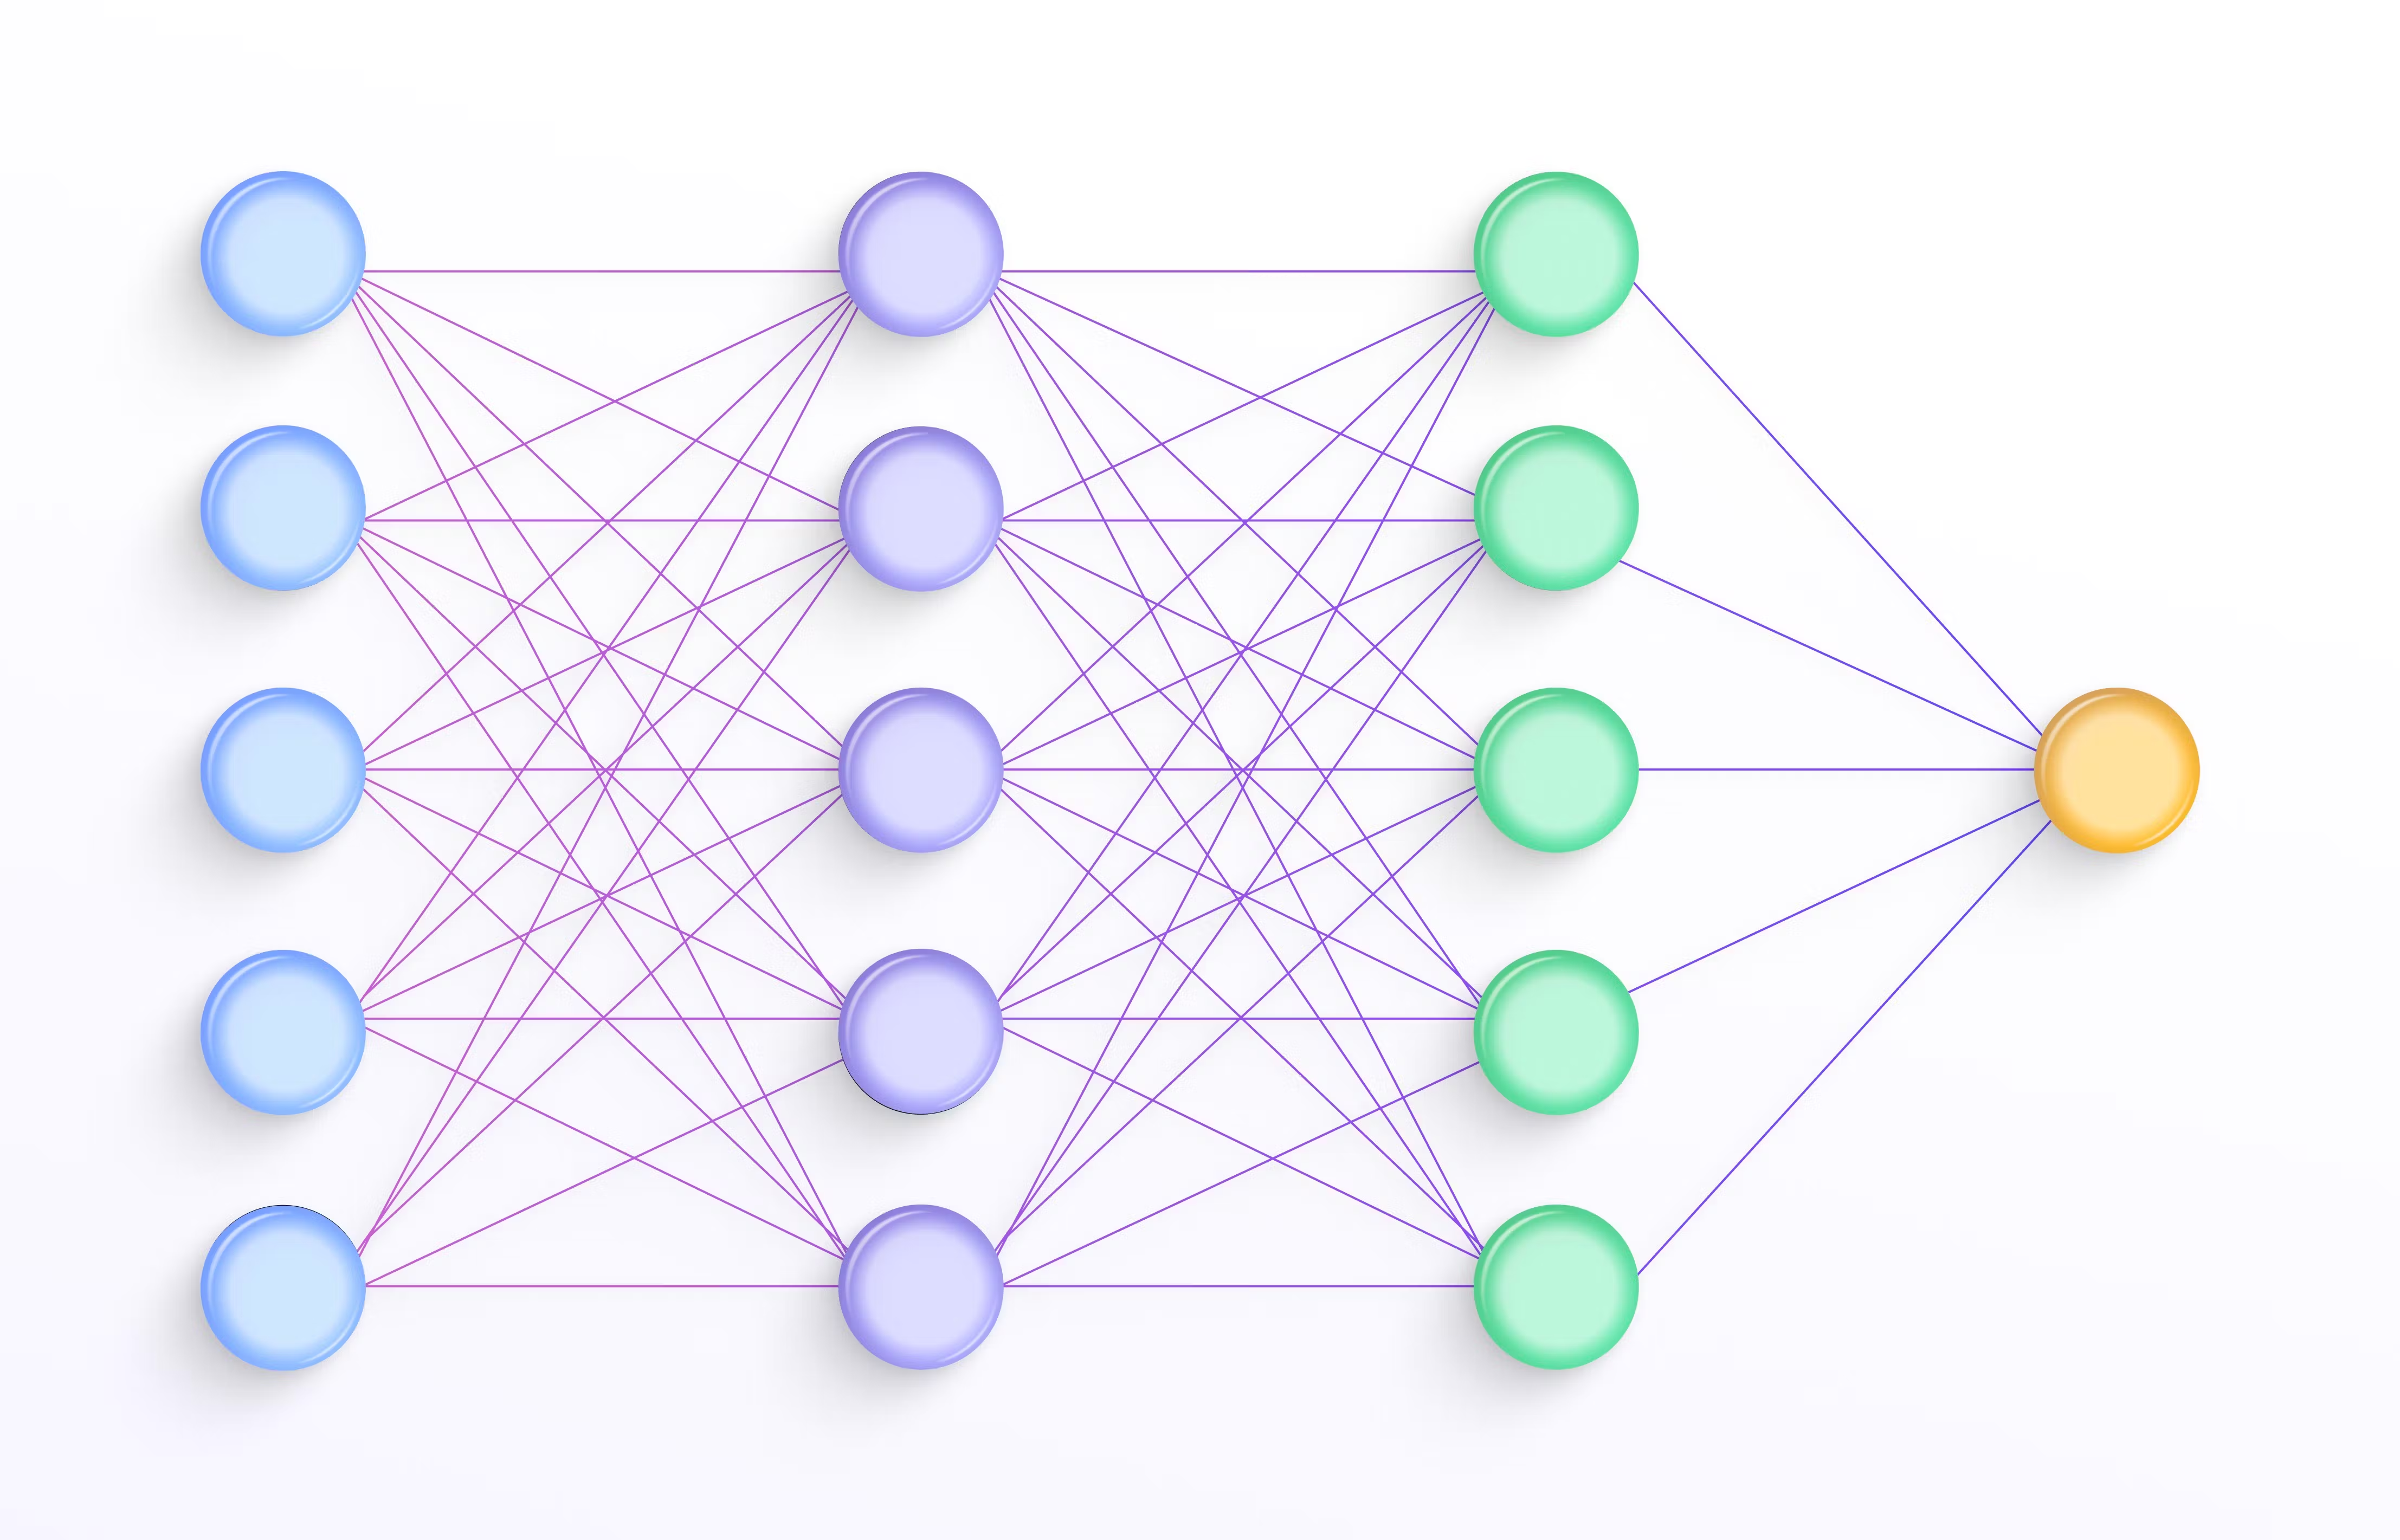

# 3. Model Building
The deep learning model is constructed in this section. The key steps are:

* Defining a Sequential model
* Adding an input layer and a dense layer with ReLU activation
* Adding the output layer
* Compiling the model with a mean squared error (MSE) loss function and Mean Absolute Error (MAE) as the evaluation metric
* Training the model with the training data
* The model is trained for 40 epochs with a batch size of 5.

In [18]:
# Model Building:
model = Sequential()
model.add(InputLayer(input_shape=features_train.shape[1]))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))

In [19]:
# Compile the model
opt = Adam(learning_rate=0.1)
model.compile(loss='mse', metrics=['mae'], optimizer=opt)

In [20]:
# Train the model
model.fit(features_train_scale, labels_train, epochs=40, batch_size=5, verbose=0)

# 4. Model Evaluation
This section evaluates the deep learning model using the testing dataset. Key steps include:

* Calculating MSE and MAE on the testing data
* Printing the evaluation results

The model's MAE is approximately 2.59, and the MSE is approximately 12.99, indicating its predictive accuracy for life expectancy.

In [21]:
# Evaluate the model
final_mse, final_mae = model.evaluate(features_test_scale, labels_test, verbose=0)
print("MAE: ", final_mae)
print("MSE: ", final_mse)

MAE:  2.593872308731079
MSE:  12.987524032592773


# 5. Visualizations
Three visualizations are presented to provide insights into the data and model predictions:

* A histogram of life expectancy
* A scatter plot of life expectancy vs. GDP, color-coded by "Status"
* A box plot of life expectancy by "Status"

These visualizations help understand the relationships and patterns in the data.

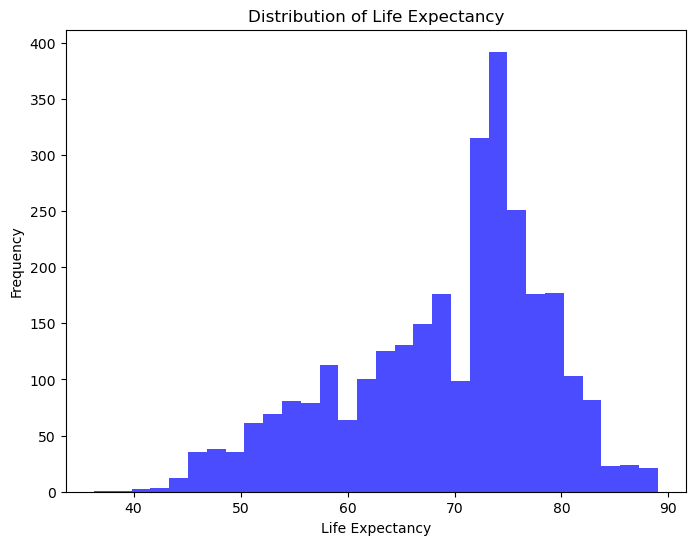

In [22]:
# Visualization 1: Histogram of Life Expectancy
plt.figure(figsize=(8, 6))
plt.hist(life_e, bins=30, color='blue', alpha=0.7)
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")
plt.show()

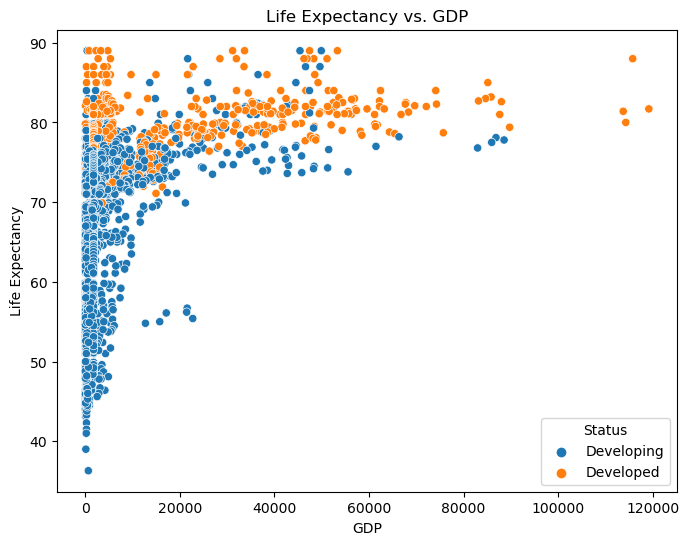

In [23]:
# Visualization 2: Scatter Plot for Life Expectancy vs. GDP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='GDP', y='Life expectancy', hue='Status')
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. GDP")
plt.show()

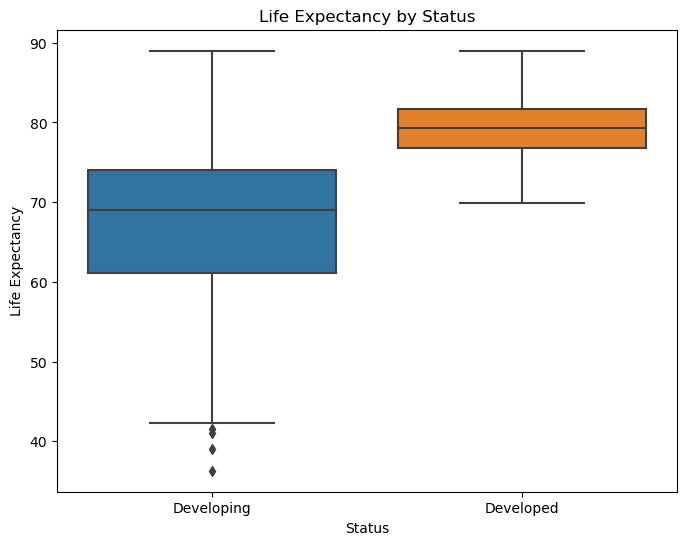

In [24]:
# Visualization 3: Box Plot for Life Expectancy by Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Status', y='Life expectancy')
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Status")
plt.show()

# 6. Feature Selection
Feature selection is performed using the SelectKBest method with f_regression as the scoring function. The selected features are used for hyperparameter tuning.

In [25]:
# Feature Selection:
selector = SelectKBest(score_func=f_regression, k=10)
selected_features = selector.fit(features_train_scale, labels_train)
features_train_selected = selected_features.transform(features_train_scale)
features_test_selected = selected_features.transform(features_test_scale)

# 7. Hyperparameter Tuning
A hyperparameter tuning process is executed using the Keras Tuner library. RandomSearch is utilized to find the best hyperparameters for the model. The following hyperparameters are tuned:

* Number of units in the hidden layer
* Learning rate

The best hyperparameters and their corresponding MSE and MAE are printed. The best model is trained with the tuned hyperparameters.

In [33]:
from kerastuner.tuners import RandomSearch
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(features_train_scale.shape[1],)))
    model.add(Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mae'])
    
    return model

In [34]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # You can increase this for more exhaustive search
    executions_per_trial=1,  # You can increase this for more robust results
    directory='my_tuner_directory',  # Specify a directory for the tuner
    project_name='my_tuner_project'
)

tuner.search(
    features_train_scale, labels_train,
    validation_split=0.2,
    epochs=40,
    verbose=1
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 00m 19s]
val_loss: 2037.700439453125

Best val_loss So Far: 5.874324321746826
Total elapsed time: 00h 01m 31s


In [40]:
best_model = build_model(best_hps)

In [41]:
best_model.fit(features_train_scale, labels_train, epochs=40, batch_size=5, verbose=0)

In [42]:
mse, mae = best_model.evaluate(features_test_scale, labels_test, verbose=0)

print("Best Hyperparameters:")
print(best_hps.get_config())
print("MSE: ", mse)
print("MAE: ", mae)

Best Hyperparameters:
{'space': [{'class_name': 'Int', 'config': {'name': 'units', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}], 'values': {'units': 224, 'learning_rate': 0.01}}
MSE:  10.448925971984863
MAE:  2.2950637340545654


# 8. Training History Plot
The training history of the best model is plotted to visualize the training and validation loss across epochs.

In [43]:
history = best_model.fit(features_train_scale, labels_train, epochs=40, batch_size=5, validation_data=(features_test_scale, labels_test), verbose=0)

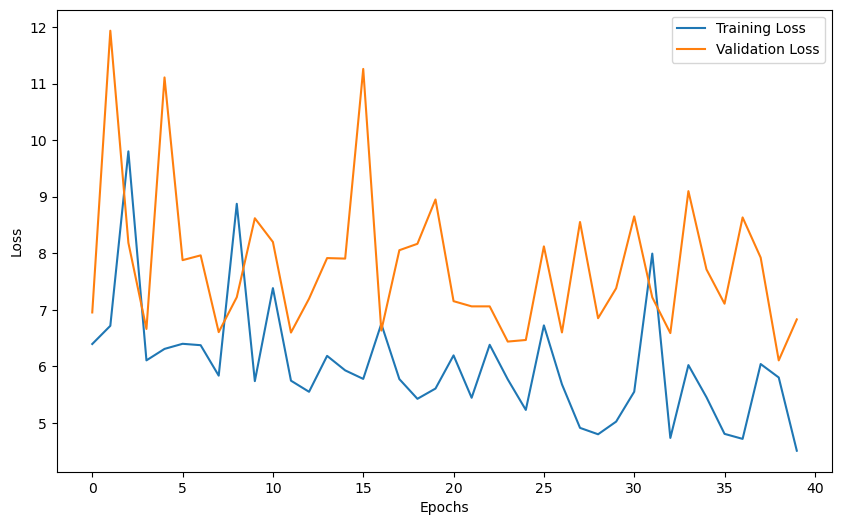

In [44]:
# Access loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss values
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 9. Prediction
A sample prediction is demonstrated by preparing new data (a single data point) with relevant features. The new data is scaled using the same transformer used for training. The model then predicts the life expectancy for the new data, and the result is printed.

In [57]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 2579 to 1761
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             588 non-null    int64  
 1   Adult Mortality                  588 non-null    float64
 2   infant deaths                    588 non-null    int64  
 3   Alcohol                          588 non-null    float64
 4   percentage expenditure           588 non-null    float64
 5   Hepatitis B                      588 non-null    float64
 6   Measles                          588 non-null    int64  
 7    BMI                             588 non-null    float64
 8   under-five deaths                588 non-null    int64  
 9   Polio                            588 non-null    float64
 10  Total expenditure                588 non-null    float64
 11  Diphtheria                       588 non-null    float64
 12   HIV/AIDS         

In [59]:
import pandas as pd
import numpy as np

# Create a dictionary with feature values for the new data point
new_data_dict = {
    'Year': [2016],  # Adjust the year as needed
    'Adult Mortality': [200.0],
    'infant deaths': [5],
    'Alcohol': [4.0],
    'percentage expenditure': [500.0],
    'Hepatitis B': [80.0],
    'Measles ': [1000],  # Corrected column name (removed extra space)
    ' BMI ': [25.0],  # Corrected column name (removed extra spaces)
    'under-five deaths ': [8],
    'Polio': [95.0],
    'Total expenditure': [6.0],
    'Diphtheria ': [95.0],  # Corrected column name (removed extra space)
    ' HIV/AIDS': [1.5],
    'GDP': [3000.0],
    'Population': [150000],
    ' thinness  1-19 years': [2.7],  # Corrected column name (removed extra spaces)
    ' thinness 5-9 years': [2.6],
    'Income composition of resources': [0.8],
    'Schooling': [12.5],
    'Status_Developed': [0],  # Adjust 0 or 1 based on the status
    'Status_Developing': [1],
}

# Create a DataFrame from the dictionary
new_data = pd.DataFrame(new_data_dict)

# Scale the new data using the same transformer used for training
new_data_scale = preprocessor.transform(new_data)
new_data_scale = pd.DataFrame(new_data_scale, columns=new_data.columns)

# Make a prediction
predicted_life_expectancy = model.predict(new_data_scale)

# Print the predicted life expectancy
print("Predicted Life Expectancy:", predicted_life_expectancy[0])

1/1 [==============================] - 0s 203ms/step
Predicted Life Expectancy: [69.0768]


# Conclusion:

Overall, this Jupyter Notebook provides a comprehensive overview of the process of predicting life expectancy using deep learning. It includes data exploration, preprocessing, model building, evaluation, visualization, feature selection, hyperparameter tuning, and prediction, allowing for a clear understanding of the project's workflow and results.